# CS769 Tutorial Week 1
# Word embeddings. Review with code  examples
# TA: Chenghao Liu




### Introduce myself

#### I'm a PhD candidate at School of Computer Science, the University of Auckland.

#### Research topics: Natural Language Processing (NLP) and Multimodal Models. Specifically, I'm very interested in the reasoning capabilities of multimodal large language models.

Email: cliu797@aucklanduni.ac.nz

<div id="first"></div>

## 1 Instruction of needed environment or package

### 1.1 Install Anaconda

Anaconda web: https://www.anaconda.com/products/individual

#### Windows

1. **Download Anaconda Installer:**
   - Go to the [Anaconda official website](https://www.anaconda.com/).
   - Click on the "Download" tab and select the Windows version of the installer to download.

2. **Run the Installer:**
   - Double-click the downloaded executable file.
   - Follow the on-screen instructions to complete the installation. It's recommended to check the option to add Anaconda to your system PATH environment variable.

3. **Verify Installation:**
   - Open Command Prompt.
   - Type `conda --version` and press Enter. You should see the version information of Anaconda.

#### macOS

1. **Download Anaconda Installer:**
   - Visit the [Anaconda official website](https://www.anaconda.com/).
   - Click on the "Download" tab and select the macOS version of the installer to download.

2. **Run the Installer:**
   - Open Terminal.
   - Navigate to the directory where the installer was downloaded and run the script:
     ```sh
     bash ~/Downloads/Anaconda3-<version>-MacOSX-x86_64.sh
     ```
   - Follow the prompts to complete the installation.

3. **Verify Installation:**
   - Open Terminal.
   - Type `conda --version` and press Enter. You should see the version information of Anaconda.

#### Linux

1. **Download Anaconda Installer:**
   - Visit the [Anaconda official website](https://www.anaconda.com/).
   - Click on the "Download" tab and select the Linux version of the installer to download.

2. **Run the Installer:**
   - Open Terminal.
   - Navigate to the directory where the installer was downloaded and run the script:
     ```sh
     bash ~/Downloads/Anaconda3-<version>-Linux-x86_64.sh
     ```
   - Follow the prompts to complete the installation.

3. **Configure Environment Variables:**
   - After installation, you might need to refresh your environment variables or restart your terminal:
     ```sh
     source ~/.bashrc
     ```

4. **Verify Installation:**
   - Open Terminal.
   - Type `conda --version` and press Enter. You should see the version information of Anaconda.

### 1.2 Python Environment Creation

On Windows, use "anaconda powershell"
On Macos or Linux, use "source </path/to/your/Anaconda3>/bin/activate"

For address
- Linux and Mac: use forward slash "/"
- Windows uses backslash "\\"


#### Create a directory for our project (Optional)
```
mkdir </path/to/your/directory>
cd </path/to/your/directory>
```

#### Create a new virtual environment
```
conda env list # Check the environment
conda create --name <env_name> python=3.10 # Create the environment with the <env_name> name
conda activate <env_name>
# "-n" for name, "-c" for channel
conda install -n <env_name> -c conda-forge numpy scikit-learn matplotlib jupyterlab pandas # Install some packges
```

#### Check the python version and packages (Optional)
```
# Avoid install packages using pip, unless you cannot find it in conda-forge.
python --version
python -m pip list

# To delete the environment
conda env remove --name venv
```

### 1.3 Jupyter Instruction

#### Activate Conda Environment

```
# Move to your project directory (Optional)
cd </path/to/your/directory>

# Activate your environment
conda activate <env_name>
```

#### Install Jupyter
```
conda install jupyter
```

#### Open Jupyter
```
jupyter notebook
```

Then you can work without the terminal. **BUT DO NOT CLOSE THE TERMINAL!**

### 1.3 (Optional) GIT Instruction

- On Winodws and Mac: https://git-scm.com/downloads
- On Linux: https://git-scm.com/download/linux
- Create a free account on [GitHub](https://github.com/).
- (Optional) Create a new repository with name **tutorial-769** on GitHub, and commit the jupyter notebook for this lab to the repo.

### 1.4 (Optional) Colab

Colab introduction: https://colab.research.google.com/#scrollTo=P-H6Lw1vyNNd

Google Colab is a free, cloud-based Jupyter notebook environment provided by Google, which allows you to write and execute Python code in your browser.

#### Step 1: Accessing Google Colab

1. **Open your web browser.**
2. **Go to the Google Colab website:**
   [Google Colab](https://colab.research.google.com/)

#### Step 2: Creating a New Notebook

1. **On the Colab homepage, click on "New Notebook"** in the lower-right corner of the window.

2. **Alternatively, you can open an existing notebook** by uploading a `.ipynb` file or selecting one from your Google Drive.

#### Step 3: Using Google Colab

##### Writing and Running Code

- **Code cells:** Click on a cell to select it. Type your code and press `Shift + Enter` to execute.
- **Add new cells:** Click on the `+ Code` button above the notebook or use the shortcut `Ctrl + M + B` to add a new code cell.

##### Installing Packages

- **To install additional Python packages:** Use the `!pip install` command within a code cell.
  ```
  !pip install package_name
   ```
   

---

## 2. What is word embedding?

According to Wikipedia, **Word embedding** is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers.

## 2.1 One-hot or CountVectorizing

The most basic method for transforming words into vectors is to count occurrence of each word in each document. Such approach is called countvectorizing or one-hot encoding.

The main principle of this method is to collect a set of documents (they can be words, sentences, paragraphs or even articles) and count the occurrence of every word in each document. Strictly speaking, the columns of the resulting matrix are words and the rows are documents.

### Example
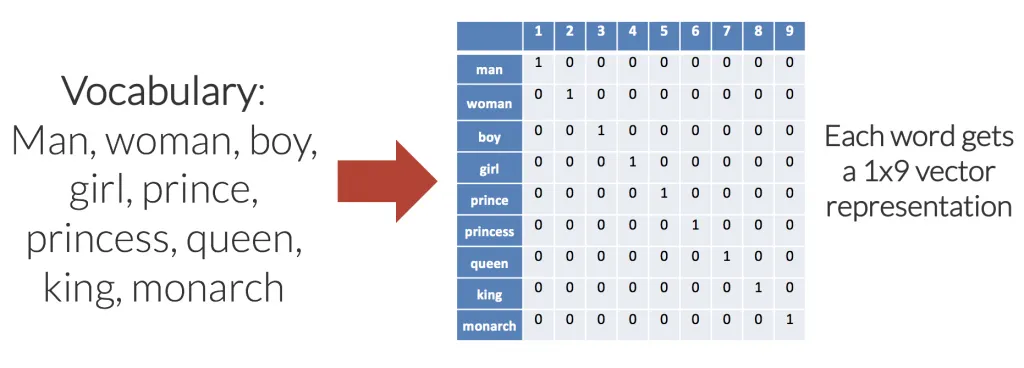


In [1]:
from sklearn.feature_extraction.text import CountVectorizer
# create CountVectorizer object
vectorizer = CountVectorizer()
corpus = [
          'Text of the very first new sentence with the first words in sentence.',
          'Text of the second sentence.',
          'Number three with lot of words words words.',
          'Short text, less words.',
]

In [2]:
corpus

In [3]:
# learn the vocabulary and store CountVectorizer sparse matrix in term_frequencies
term_frequencies = vectorizer.fit_transform(corpus)
vocab = vectorizer.get_feature_names_out()
vocab

In [4]:
term_frequencies = term_frequencies.toarray() # convert sparse matrix to numpy array
term_frequencies

In [5]:
import seaborn as sns
sns.heatmap(term_frequencies, annot=True, cbar = False, xticklabels = vocab);

In [6]:
# Convert another document with countvectorizing
vectorizer.transform(['A new new sentence.']).toarray()

Another approach in countvectorizing is just to place 1 if the word is found in the document (no matter how often) and 0 if the word is not found in the document. In this case we get real 'one-hot' encoding.

In [7]:
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
one_hot

In [8]:
sns.heatmap(one_hot, annot=True, cbar = False, xticklabels = vocab)

## 2.2 TF-IDF encoding

With a large corpus of documents some words like ‘a’, ‘the’, ‘is’, etc. occur very frequently but they don’t carry a lot of information. Using one-hot encoding approach we can decide that these words are important because they appear in many documents. One of the ways to solve this problem is stopwords filtering, but this solution is discrete and not flexible.

TF-IDF (term frequency - inverse document frequency) can deal with this problem better. TF-IDF lowers the weight of commonly used words and raises the weight of rare words that occur only in current document. TF-IDF formula looks like this:
<br><br>

$tfidf(term, document)= tf(term, document) \cdot idf(term)$

<br>
Where TF is calculated by dividing number of times the word occurs in the document by the total number of words in the document

$tf(term, document)= \frac{n_i}{\sum_{k=1}^W n_k}$

IDF (inverse document frequency), interpreted like inversed number of documents, in which the term we’re interested in occurs. N - number of documents, n(t) - number of documents with current word or term t.


$idf(term) = \log {\frac{N}{n_t}} $

### Example:


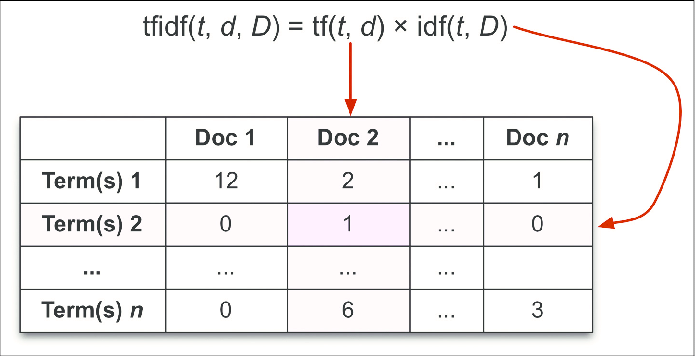




In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

corpus = [
          'Time flies like an arrow.',
          'Fruit flies like a banana.'
]

vocab = ['an', 'arrow', 'banana', 'flies', 'fruit', 'like', 'time']

In [10]:
tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
tfidf

In [11]:
sns.heatmap(tfidf, annot=True, cbar = False, xticklabels = vocab)

## 2.3 Word2Vec and GloVe

The most commonly used models for word embeddings are [word2vec](https://github.com/dav/word2vec/) and [GloVe](https://nlp.stanford.edu/projects/glove/) which are both unsupervised approaches based on the distributional hypothesis (words that occur in the same contexts tend to have similar meanings).

Word2Vec word embeddings are vector representations of words,
that are typically learnt by an unsupervised model when fed
with large amounts of text as input (e.g. Wikipedia, science, news, articles etc.). These representation of words capture semantic similarity between words among other properties. Word2Vec word embeddings are learnt in a such way, that [distance](https://en.wikipedia.org/wiki/Euclidean_distance) between vectors for words with close meanings ("king" and "queen" for example) are closer than distance for words with complety different meanings ("king" and "carpet" for example).

### Example:


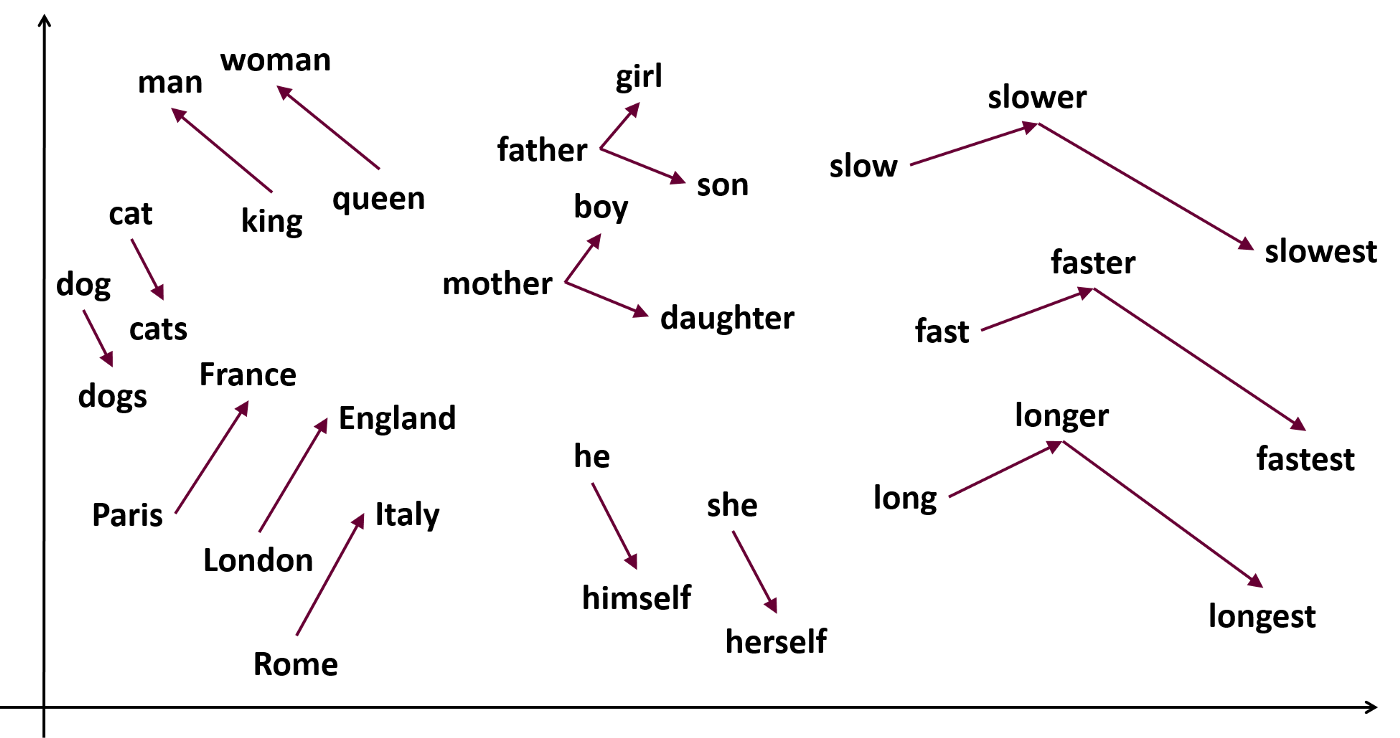



In [6]:
# Try Word2Vec with Gensim

import gensim.downloader as api

# Load pretrained vectors from Google
model = api.load("glove-wiki-gigaword-50")

# Load Word2Vec
# model = api.load('word2vec-google-news-300')

In [ ]:
king = model['king']
print(king.shape)
print(king[:10])

In [ ]:
# king - man + woman = queen
print(model.most_similar(positive=['woman', 'king'], negative=['man'])[:3])

In [ ]:
print(model.doesnt_match("breakfast robot dinner lunch".split()))

In [ ]:
print(model.similarity('woman', 'man'))

In [ ]:
print(model.similarity('king', 'woman'))

Another word embedding method is **Glove** (“Global Vectors”). It is based on matrix factorization techniques on the word-context matrix. It first constructs a large matrix of (words x context) co-occurrence information, i.e. for each “word” (the rows), you count how frequently we see this word in some “context” (the columns) in a large corpus. Then this matrix is factorized to a lower-dimensional (word x features) matrix, where each row now stores a vector representation for each word. In general, this is done by minimizing a “reconstruction loss”. This loss tries to find the lower-dimensional representations which can explain most of the variance in the high-dimensional data.

In [7]:
# Try Glove word embeddings with Spacy

!python3 -m spacy download en_core_web_lg

In [8]:
import spacy
# Load the spacy model that you have installed
import en_core_web_lg
nlp = en_core_web_lg.load()
# process a sentence using the model
doc = nlp("man king stands on the carpet and sees woman queen")
# Get the vector for 'king':
doc[1].vector[0:50]

Find similarity between King and Queen (higher value is better).

In [9]:
doc[1].similarity(doc[9])

Find similarity between King and carpet

In [10]:
doc[1].similarity(doc[5])

Check if king - man + woman = queen. We will multiply vectors for 'man' and 'woman' by two, because subtracting the vector for 'man' and adding the vector for 'woman' will do little to the original vector for “king”, likely because those “man” and “woman” are related themselves.

In [11]:
v =  doc[1].vector - (doc[0].vector*2) + (doc[8].vector*2)

In [12]:
from scipy.spatial import distance
import numpy as np

# Format the vocabulary for use in the distance function
vectors = [token.vector for token in doc]
vectors = np.array(vectors)

# Find the closest word below
closest_index = distance.cdist(np.expand_dims(v, axis = 0), vectors, metric = 'cosine').argmin()
output_word = doc[closest_index].text


In [13]:
output_word

## 2.4 Transformers

At last it's time for current state-of-the-art approach - Transformers. Famous [GPT-2](https://openai.com/blog/better-language-models/), [BERT](https://github.com/google-research/bert), [CTRL](https://blog.einstein.ai/introducing-a-conditional-transformer-language-model-for-controllable-generation/) are all Transformers-based and produce context-sensitive embeddings like ELMo. But unlike ELMo Transformers do not use [RNN](https://en.wikipedia.org/wiki/Recurrent_neural_network), trey do not require to process words in sentence sequentially one-by-one. All words in the sentence are processed in parallel, this approach speeds up processing and solves [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

Transformers use the [attention mechanizm](https://arxiv.org/abs/1706.03762) to describe the connections and dependencies of each specific word with all other words in the sentence. This mechanism and the main principles of Transformers described in detail in a beautifully illustrated [article](http://jalammar.github.io/illustrated-transformer/) by Jay Alammar.

![alt text](http://jalammar.github.io/images/t/transformer_resideual_layer_norm_3.png) Image from[ http://jalammar.github.io](http://jalammar.github.io/illustrated-transformer/)



For our example we wil use brilliant [Transformers](https://huggingface.co/transformers/) library, which contains the latest Transformers-based models (such as [BERT](https://huggingface.co/transformers/model_doc/bert.html), [XLNet](https://huggingface.co/transformers/model_doc/xlnet.html), [DialoGPT](https://huggingface.co/transformers/model_doc/dialogpt.html) or [GPT-2](https://huggingface.co/transformers/model_doc/gpt2.html)).

Let's make some embeddings with BERT. Firstly we will need to install Transformers library.

In [ ]:
!pip install transformers

Now we import pytorch, the pretrained BERT model, and a BERT tokenizer, that will do all the needed work of converting sentences into format appropriate for BERT (tokenizing itself and adding special tokens like [SEP] and [CLS]).

In [ ]:
import torch
torch.manual_seed(0)
from transformers import BertTokenizer, BertModel

import logging
import matplotlib.pyplot as plt


# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Enter some sentences and tokenize them.

In [ ]:
sentences =  \
['king arthur, also called arthur or aathur pendragon, legendary british king who appears in a cycle of \
medieval romances (known as the matter of britain) as the sovereign of a knightly fellowship of the round table.',
'it is not certain how these legends originated or whether the figure of arthur was based on a historical person.',
'the legend possibly originated either in wales or in those parts of northern britain inhabited by brythonic-speaking celts.',
'for a fuller treatment of the stories about king arthur, see also arthurian legend.']

sentences

In [ ]:
# Print the original sentence.
print(' Original: ', sentences[0][:99])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(sentences[0])[:15])

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0]))[:15])


Note that some tokens may look like this: ['aa', '##th', '##ur', 'pen', '##dra', '##gon']. This is because of the BERT tokenizer was created with a WordPiece model. This model greedily creates a fixed-size vocabulary of individual characters, subwords, and words that best fits our language data. BERT tokenizer uses vocabulary that contains all English characters plus the ~30,000 most common words and subwords found in the English language corpus the model is trained on. So, if the word is not mentioned in a vocabulary, that words is splitted into subwords and characters.  The two hash signs (##) before some subwords shows that subword is part of a larger word and preceded by another subword.   

We will use tokenizer.encode_plus function, that will:

- Split the sentence into tokens.
- Add the special [CLS] and [SEP] tokens.
- Map the tokens to their IDs.
- Pad or truncate all sentences to the same length.
- Create the attention masks which explicitly differentiate real tokens from [PAD] tokens.


In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []
tokenized_texts = []

for sent in sentences:
    encoded_dict = tokenizer.encode_plus(
        sent,
        add_special_tokens=True,
        truncation=True,
        max_length=48,
        padding='max_length',
        return_tensors='pt',
        return_attention_mask=True
    )

    tokenized_texts.append(tokenizer.tokenize("[CLS] " + sent + " [SEP]"))
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

# Convert lists to tensors
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)

# Print results
print('Token IDs:', input_ids[0])
print('Tokenized (first 15):', tokenizer.tokenize(sentences[0])[:15])
print('Token ID values (first 15):', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences[0]))[:15])

**Segment ID**. BERT is trained on and expects sentence pairs using 1s and 0s to distinguish between the two sentences. We will encode each sentence separately so we will just mark each token in each sentence with 1.

In [ ]:
segments_ids = torch.ones_like(input_ids)
segments_ids.shape

Now we can call BERT model and finally get embeddings.

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased',
                                  output_hidden_states = True, # Whether the model returns all hidden-states.
                                  )
model.eval();

In [ ]:
with torch.no_grad():

    outputs = model(input_ids, segments_ids)

    # Evaluating the model will return a different number of objects based on
    # how it's  configured in the `from_pretrained` call earlier. In this case,
    # becase we set `output_hidden_states = True`, the third item will be the
    # hidden states from all layers. See the documentation for more details:
    # https://huggingface.co/transformers/model_doc/bert.html#bertmodel
    hidden_states = outputs[2]

Let's examine what we've got.

In [ ]:
print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
print ("Number of batches:", len(hidden_states[0]))
print ("Number of tokens:", len(hidden_states[0][0]))
print ("Number of hidden units:", len(hidden_states[0][0][0]))


In [ ]:
# Concatenate the tensors for all layers. We use `stack` here to
# create a new dimension in the tensor.
token_embeddings = torch.stack(hidden_states, dim=0)

token_embeddings.size()

In [ ]:
# Swap dimensions, so we get tensors in format: [sentence, tokens, hidden layes, features]
token_embeddings = token_embeddings.permute(1,2,0,3)

token_embeddings.size()

In [ ]:
# we will use last four hidden layers to create each word embedding

processed_embeddings = token_embeddings[:, :, 9:, :]
processed_embeddings.shape

In [ ]:
# Concatenate four layers for each token to create embeddings

embeddings = torch.reshape(processed_embeddings, (4, 48, -1))
embeddings.shape

Let's examine embeddings for the first sentence. Firstly we need to get ids of tokens we need to compare.

In [ ]:
for i, token_str in enumerate(tokenized_texts[0]):
  print (i, token_str)

We can see that word 'king' is places at indexes 1 and 17. We will check distance between embeddings 1 and 17. Also, we will check if embedding for word 'arthur' is closer to king then word 'table'.

In [ ]:
from scipy.spatial.distance import cosine

kings = cosine(embeddings[0][1], embeddings[0][17])
king_table = cosine(embeddings[0][1], embeddings[0][46])
king_archtur = cosine(embeddings[0][2], embeddings[0][1])

print('Distance for two kings:  %.2f' % kings)
print('Distance from king to table:  %.2f' % king_table)
print('Distance from Archtur to king:  %.2f' % king_archtur)

So we see that embeddings for two 'kings' are quite similar but not same, and Archtur is closer to be a king than a table.

In [ ]:
!pip install bertviz

In [ ]:
from transformers import BertTokenizer, BertModel
from bertviz import head_view
import torch

# Step 1: Load model with attention outputs
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name, output_attentions=True)
model.eval()

# Step 2: Prepare a single sentence (head_view only supports one at a time)
sentence = "King Arthur was a legendary British king."
inputs = tokenizer(sentence, return_tensors='pt')

# Step 3: Forward pass with attention outputs
with torch.no_grad():
    outputs = model(**inputs)
    attention = outputs.attentions  # a tuple with attention maps from each layer

# Step 4: Use head_view
head_view(attention, tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))

## References

- [BERT Word Embeddings Tutorial](https://mccormickml.com/2019/05/14/BERT-word-embeddings-tutorial/)
- [The Illustrated Transformer](http://jalammar.github.io/illustrated-transformer/)
- [The Illustrated GPT-2 (Visualizing Transformer Language Models)](http://jalammar.github.io/illustrated-gpt2/)
- [FROM Pre-trained Word Embeddings TO Pre-trained Language Models — Focus on BERT](https://towardsdatascience.com/from-pre-trained-word-embeddings-to-pre-trained-language-models-focus-on-bert-343815627598)
- [ Make your own Rick Sanchez (bot) with Transformers and DialoGPT fine-tuning](https://towardsdatascience.com/make-your-own-rick-sanchez-bot-with-transformers-and-dialogpt-fine-tuning-f85e6d1f4e30)
- [Playing with word vectors](https://medium.com/swlh/playing-with-word-vectors-308ab2faa519)
- [Intuitive Guide to Understanding GloVe Embeddings](https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010)
- [Word Embeddings in Python with Spacy and Gensim](https://www.shanelynn.ie/word-embeddings-in-python-with-spacy-and-gensim/)
- [Brief review of word embedding families (2019) ](https://medium.com/analytics-vidhya/brief-review-of-word-embedding-families-2019-b2bbc601bbfe)
- [Word embeddings: exploration, explanation, and exploitation (with code in Python)](https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795)